In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mplot
import seaborn as sb
from sklearn import metrics
import xgboost as xgb

In [36]:
data=pd.read_csv('Downloads/phishing.csv')

In [37]:
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [38]:
data.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [39]:
data.shape

(11054, 32)

In [40]:
data.isnull().sum()

Index                  0
UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

In [41]:
from sklearn.model_selection import train_test_split,cross_val_score

In [42]:
X = data.drop(["class","Index","AnchorURL","RequestURL","LinksInScriptTags","StatusBarCust","GoogleIndex","WebsiteTraffic"],axis =1)
X.head()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,AbnormalURL,WebsiteForwarding,DisableRightClick,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,PageRank,LinksPointingToPage,StatsReport
0,1,1,1,1,1,-1,0,1,-1,1,...,1,0,1,1,1,-1,-1,-1,1,1
1,1,0,1,1,1,-1,-1,-1,-1,1,...,-1,0,1,1,1,1,-1,-1,0,-1
2,1,0,1,1,1,-1,-1,-1,1,1,...,1,0,1,1,1,-1,-1,-1,-1,1
3,1,0,-1,1,1,-1,1,1,-1,1,...,1,0,1,-1,1,-1,-1,-1,1,1
4,-1,0,-1,1,-1,-1,1,1,-1,1,...,-1,0,1,1,1,1,1,-1,-1,-1


In [43]:
Y=data['class']
Y=pd.DataFrame(Y)
Y.head()

,class
0,-1
1,-1
2,-1
3,1
4,1


In [44]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y, test_size = 0.2 ,random_state = 42)

In [45]:
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)

(8843, 24)
(2211, 24)
(8843, 1)
(2211, 1)


In [46]:
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score, recall_score

In [47]:
log = LogisticRegression()
log.fit(train_X,train_Y)

C:\Users\Sareeta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [48]:
y_train_log = log.predict(train_X)
y_test_log = log.predict(test_X)

In [49]:
acc_train_log = metrics.accuracy_score(train_Y,y_train_log)
acc_test_log = metrics.accuracy_score(test_Y,y_test_log)

print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()


f1_score_train_log = metrics.f1_score(train_Y,y_train_log)
f1_score_test_log = metrics.f1_score(test_Y,y_test_log)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_train_log = metrics.recall_score(train_Y,y_train_log)
recall_test_log = metrics.recall_score(test_Y,y_test_log)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_test_log))
print()

precision_train_log = metrics.precision_score(train_Y,y_train_log)
precision_test_log = metrics.precision_score(test_Y,y_test_log)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_test_log))

Logistic Regression : Accuracy on training Data: 0.891
Logistic Regression : Accuracy on test Data: 0.897

Logistic Regression : f1_score on training Data: 0.904
Logistic Regression : f1_score on test Data: 0.910

Logistic Regression : Recall on training Data: 0.919
Logistic Regression : Recall on test Data: 0.926

Logistic Regression : precision on training Data: 0.889
Logistic Regression : precision on test Data: 0.894


In [50]:
print(metrics.classification_report(test_Y, y_test_log))

              precision    recall  f1-score   support

          -1       0.90      0.86      0.88       976
           1       0.89      0.93      0.91      1235

    accuracy                           0.90      2211
   macro avg       0.90      0.89      0.90      2211
weighted avg       0.90      0.90      0.90      2211



In [51]:
def plot_confusion_matrix(test_Y, predict_y):
    C = confusion_matrix(test_Y, predict_y)
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    labels = [1, 2]
    cmap = plt.get_cmap('Blues')
    
    # Plot Confusion Matrix
    plt.figure(figsize=(18, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(C, interpolation='nearest', cmap=cmap)
    plt.title("Confusion Matrix")
    plt.colorbar()
    for i in range(len(labels)):
        for j in range(len(labels)):
            plt.text(j, i, str(C[i, j]), va='center', ha='center', color='red', fontweight='bold')
    plt.xticks(range(len(labels)), labels)
    plt.yticks(range(len(labels)), labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')

    # Plot Precision Matrix
    plt.subplot(1, 3, 2)
    plt.imshow(B, interpolation='nearest', cmap=cmap)
    plt.title("Precision Matrix")
    plt.colorbar()
    for i in range(len(labels)):
        for j in range(len(labels)):
            plt.text(j, i, f'{B[i, j]:.2f}', va='center', ha='center', color='red', fontweight='bold')
    plt.xticks(range(len(labels)), labels)
    plt.yticks(range(len(labels)), labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')

    # Plot Recall Matrix
    plt.subplot(1, 3, 3)
    plt.imshow(A, interpolation='nearest', cmap=cmap)
    plt.title("Recall Matrix")
    plt.colorbar()
    for i in range(len(labels)):
        for j in range(len(labels)):
            plt.text(j, i, f'{A[i, j]:.2f}', va='center', ha='center', color='red', fontweight='bold')
    plt.xticks(range(len(labels)), labels)
    plt.yticks(range(len(labels)), labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')

    plt.tight_layout()
    plt.show()




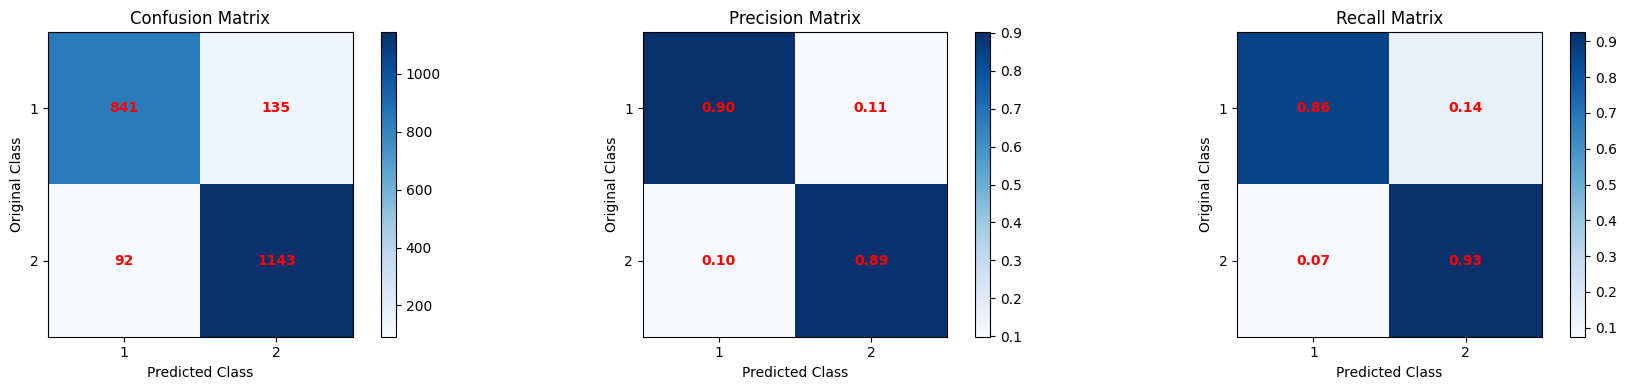

In [52]:
plot_confusion_matrix(test_Y, y_test_log)

In [53]:
ML_Model = []
accuracy = []
f1_score = []
recall=[]
precision = []

def storeResults(model, acc,f1,re,pre):
  ML_Model.append(model)
  accuracy.append(round(acc, 3))
  f1_score.append(round(f1, 3))
  recall.append(round(re,3))
  precision.append(round(pre, 3))

In [54]:
storeResults('Logistic Regression',acc_test_log,f1_score_test_log,recall_test_log,precision_test_log)

In [55]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier()

# fit the model 
tree.fit(train_X, train_Y)

DecisionTreeClassifier()

In [56]:
#predicting the target value from the model for the samples

y_train_tree = tree.predict(train_X)
y_test_tree = tree.predict(test_X)

In [57]:
acc_train_tree = metrics.accuracy_score(train_Y,y_train_tree)
acc_test_tree = metrics.accuracy_score(test_Y,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(train_Y,y_train_tree)
f1_score_test_tree = metrics.f1_score(test_Y,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_train_tree = metrics.recall_score(train_Y,y_train_tree)
recall_test_tree = metrics.recall_score(test_Y,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_test_tree))
print()

precision_train_tree = metrics.precision_score(train_Y,y_train_tree)
precision_test_tree = metrics.precision_score(test_Y,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_test_tree))

Decision Tree : Accuracy on training Data: 0.956
Decision Tree : Accuracy on test Data: 0.939

Decision Tree : f1_score on training Data: 0.961
Decision Tree : f1_score on test Data: 0.946

Decision Tree : Recall on training Data: 0.962
Decision Tree : Recall on test Data: 0.951

Decision Tree : precision on training Data: 0.959
Decision Tree : precision on test Data: 0.941


In [58]:
print(metrics.classification_report(test_Y, y_test_tree))

              precision    recall  f1-score   support

          -1       0.94      0.92      0.93       976
           1       0.94      0.95      0.95      1235

    accuracy                           0.94      2211
   macro avg       0.94      0.94      0.94      2211
weighted avg       0.94      0.94      0.94      2211



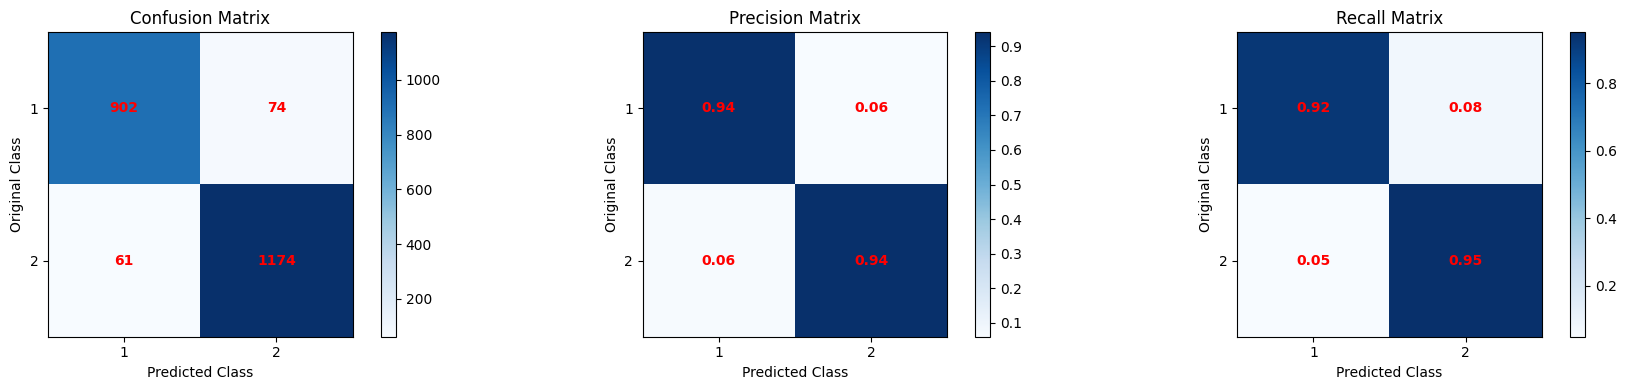

In [59]:
plot_confusion_matrix(test_Y, y_test_tree)

In [60]:
storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,recall_test_tree,precision_test_tree)

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)
gbc.fit(train_X,train_Y)  

C:\Users\Sareeta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [62]:
y_train_gbc = gbc.predict(train_X)
y_test_gbc = gbc.predict(test_X)

In [63]:
acc_train_gbc = metrics.accuracy_score(train_Y,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(test_Y,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(train_Y,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(test_Y,y_test_gbc)

print("Gradient Boosting Classifier : F1 score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : F1 score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_train_gbc = metrics.recall_score(train_Y,y_train_gbc)
recall_test_gbc = metrics.recall_score(test_Y,y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_test_gbc))
print()


precision_train_gbc = metrics.precision_score(train_Y,y_train_gbc)
precision_test_gbc = metrics.precision_score(test_Y,y_test_gbc)

print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(precision_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(precision_test_gbc))
print()

Gradient Boosting Classifier : Accuracy on training Data: 0.951
Gradient Boosting Classifier : Accuracy on test Data: 0.938

Gradient Boosting Classifier : F1 score on training Data: 0.956
Gradient Boosting Classifier : F1 score on test Data: 0.945

Gradient Boosting Classifier : Recall on training Data: 0.960
Gradient Boosting Classifier : Recall on test Data: 0.951

Gradient Boosting Classifier : Accuracy on training Data: 0.953
Gradient Boosting Classifier : Accuracy on test Data: 0.939



In [64]:
storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,recall_test_gbc,precision_test_gbc)

In [65]:
print(metrics.classification_report(test_Y, y_test_gbc))

              precision    recall  f1-score   support

          -1       0.94      0.92      0.93       976
           1       0.94      0.95      0.94      1235

    accuracy                           0.94      2211
   macro avg       0.94      0.94      0.94      2211
weighted avg       0.94      0.94      0.94      2211



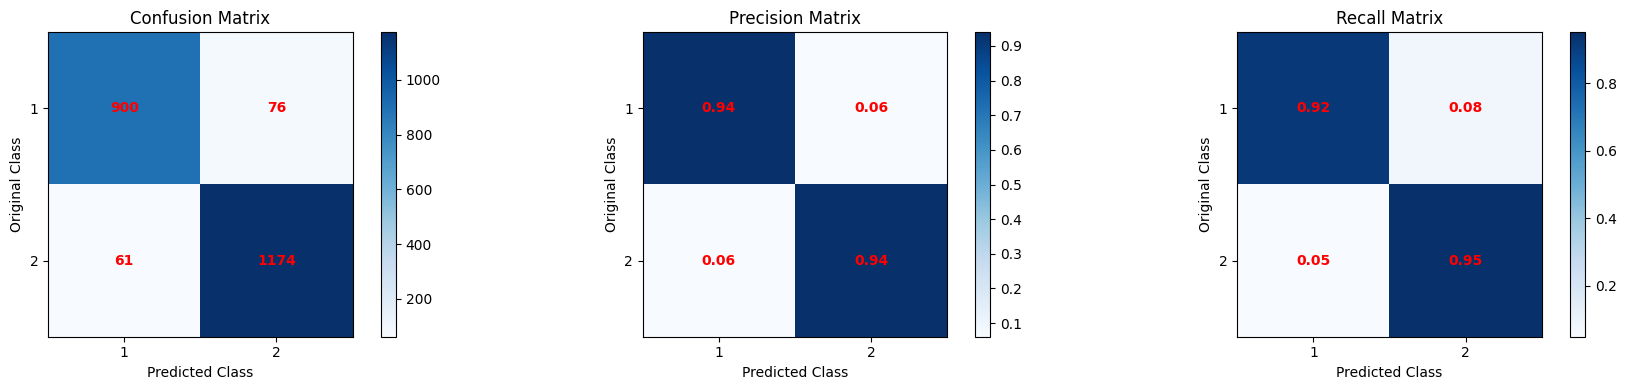

In [66]:
plot_confusion_matrix(test_Y, y_test_gbc)

In [67]:
# from xgboost import XGBClassifier
# xgbc=XGBClassifier()
# xgbc.fit(train_X,train_Y)
# y_train_xgbc = xgbc.predict(train_X)
# y_test_xgbc = xgbc.predict(test_X)
# acc_train_xgbc = metrics.accuracy_score(train_Y,y_train_xgbc)
# acc_test_xgbc = metrics.accuracy_score(test_Y,y_test_xgbc)
# print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_xgbc))
# print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_xgbc))
# print()

# f1_score_train_xgbc = metrics.f1_score(train_Y,y_train_xgbc,average='weighted')
# f1_score_test_xgbc = metrics.f1_score(test_Y,y_test_xgbc,average='weighted')

# print("Gradient Boosting Classifier : F1 score on training Data: {:.3f}".format(f1_score_train_xgbc))
# print("Gradient Boosting Classifier : F1 score on test Data: {:.3f}".format(f1_score_test_xgbc))
# print()

# recall_train_xgbc = metrics.recall_score(train_Y,y_train_xgbc,average='weighted')
# recall_test_xgbc = metrics.recall_score(test_Y,y_test_xgbc,average='weighted')
# print("Decision Tree : Recall on training Data: {:.3f}".format(recall_train_xgbc))
# print("Decision Tree : Recall on test Data: {:.3f}".format(recall_test_xgbc))
# print()


# precision_train_xgbc = metrics.precision_score(train_Y,y_train_xgbc,average='weighted')
# precision_test_xgbc = metrics.precision_score(test_Y,y_test_xgbc,average='weighted')

# print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(precision_train_xgbc))
# print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(precision_test_xgbc))
# print()

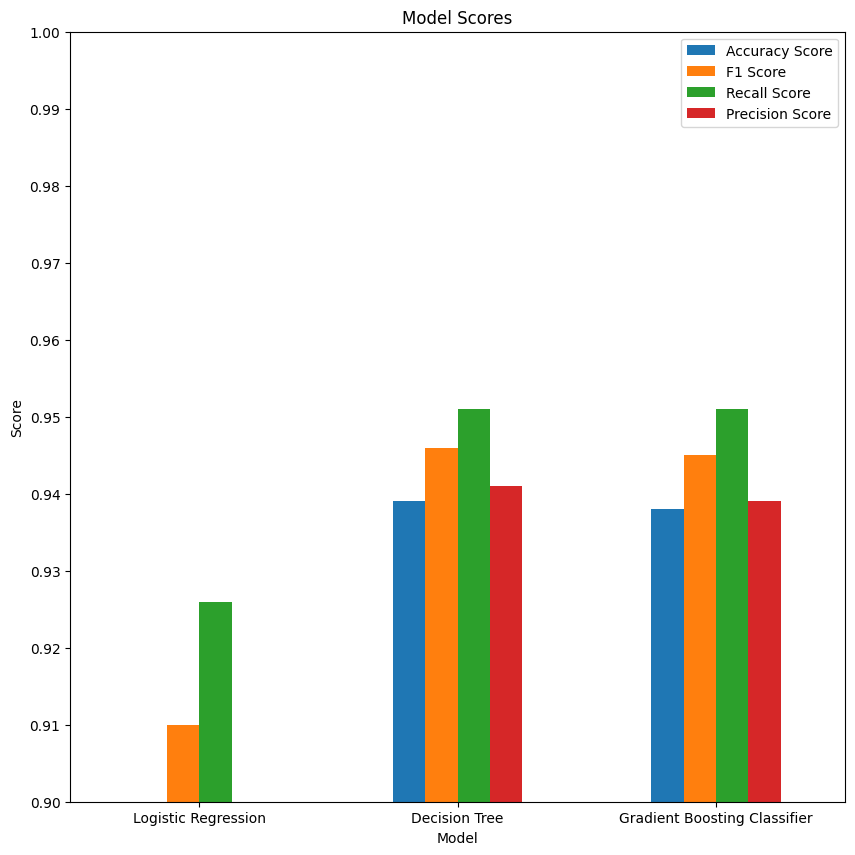

In [68]:
df = pd.DataFrame({
    'Modelname': ML_Model,
    'Accuracy Score': accuracy,
    'F1 Score': f1_score,
    'Recall Score':recall,
    'Precision Score': precision
})
df.set_index('Modelname', inplace=True)

# plot the scores for each model

fig, ax = plt.subplots(figsize=(10,10))
df.plot(kind='bar', ax=ax)
ax.set_xticklabels(df.index, rotation=0)
ax.set_ylim([0.9, 1])
ax.set_yticks([0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Model Scores')
plt.show()